# Cargar Datasets

In [ ]:
import pandas as pd

In [ ]:
# Cargar los datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# conteno nulos por dataset

In [ ]:
print("Movies dataset:")
print(movies.head())

# Encontrar el número de valores nulos por cada columna
nulos_movies = movies.isnull().sum()

# Mostrar los valores nulos por columna
print("\nNúmero de valores nulos por columna:")
print(nulos_movies)

Movies dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Número de valores nulos por columna:
movieId    0
title      0
genres     0
dtype: int64


In [ ]:
print("\nRatings dataset:")
print(ratings.head())

# Encontrar el número de valores nulos por cada columna
nulos_ratings = ratings.isnull().sum()

# Mostrar los valores nulos por columna
print("\nNúmero de valores nulos por columna:")
print(nulos_ratings)


Ratings dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Número de valores nulos por columna:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


# Union datasets

In [ ]:
# Unir los datasets
merged_df = pd.merge(ratings, movies, on='movieId')

# Filtrar columnas relevantes
merged_df = merged_df[['userId', 'movieId', 'rating', 'title']]

# Mostrar las primeras filas del dataframe unido
print(merged_df.head())

   userId  movieId  rating             title
0       1        1     4.0  Toy Story (1995)
1       5        1     4.0  Toy Story (1995)
2       7        1     4.5  Toy Story (1995)
3      15        1     2.5  Toy Story (1995)
4      17        1     4.5  Toy Story (1995)


# Implementacion inicial KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Crear la matriz de usuario-película
user_movie_matrix = merged_df.pivot_table(index='userId', columns='title', values='rating').fillna(0)

# Normalizar los datos
scaler = StandardScaler()
user_movie_matrix_scaled = scaler.fit_transform(user_movie_matrix)

# Aplicar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(user_movie_matrix_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
# Asignar los clusters a los usuarios
user_clusters = kmeans.labels_
# Crear un dataframe con los usuarios y sus clusters
user_clusters_df = pd.DataFrame({'userId': user_movie_matrix.index, 'cluster': user_clusters})

# Unir los clusters al dataframe original
merged_df = pd.merge(merged_df, user_clusters_df, on='userId', how='left')

print(merged_df.head())

   userId  movieId  rating             title  cluster
0       1        1     4.0  Toy Story (1995)        4
1       5        1     4.0  Toy Story (1995)        4
2       7        1     4.5  Toy Story (1995)        4
3      15        1     2.5  Toy Story (1995)        4
4      17        1     4.5  Toy Story (1995)        4


In [ ]:
# Evaluar clusters
cluster_summary = merged_df.groupby('cluster')['rating'].mean().reset_index()
print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
   cluster    rating
0        0  3.683966
1        1  2.642050
2        2  3.444435
3        3  2.847371
4        4  3.538637


In [ ]:
# Películas más populares en cada cluster
popular_movies = merged_df.groupby(['cluster', 'title']).size().reset_index(name='count')
top_movies = popular_movies.sort_values(['cluster', 'count'], ascending=[True, False]).groupby('cluster').head(5)
print("\nTop Movies in Each Cluster:")
print(top_movies)


Top Movies in Each Cluster:
       cluster                                              title  count
4            0                              101 Dalmatians (1996)      2
8            0                                   12 Rounds (2009)      2
11           0                                   16 Blocks (2006)      2
13           0  2 Fast 2 Furious (Fast and the Furious 2, The)...      2
14           0                       2001: A Space Odyssey (1968)      2
1731         1                                 'burbs, The (1989)      1
1732         1                        (500) Days of Summer (2009)      1
1733         1                     *batteries not included (1987)      1
1734         1                  10 Things I Hate About You (1999)      1
1735         1                            12 Years a Slave (2013)      1
4232         2                       2001: A Space Odyssey (1968)      3
4236         2                                    21 Grams (2003)      3
4239         2        

#Visualizaciones de clusteres


<ipython-input-50-2ec3f5e6e514>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='rating', data=cluster_summary, palette='viridis')


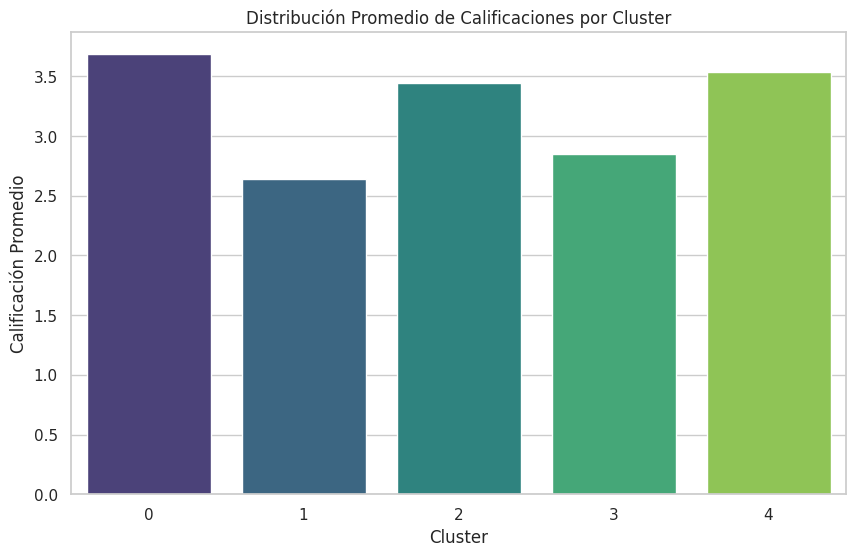

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de barras para la distribución de calificaciones por cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='rating', data=cluster_summary, palette='viridis')
plt.title('Distribución Promedio de Calificaciones por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Calificación Promedio')
plt.show()

<ipython-input-51-ab08c7a8c25c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='title', data=cluster_movies, palette='viridis', ax=ax)
<ipython-input-51-ab08c7a8c25c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='title', data=cluster_movies, palette='viridis', ax=ax)
<ipython-input-51-ab08c7a8c25c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='title', data=cluster_movies, palette='viridis', ax=ax)
<ipython-input-51-ab08c7a8c25c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is 

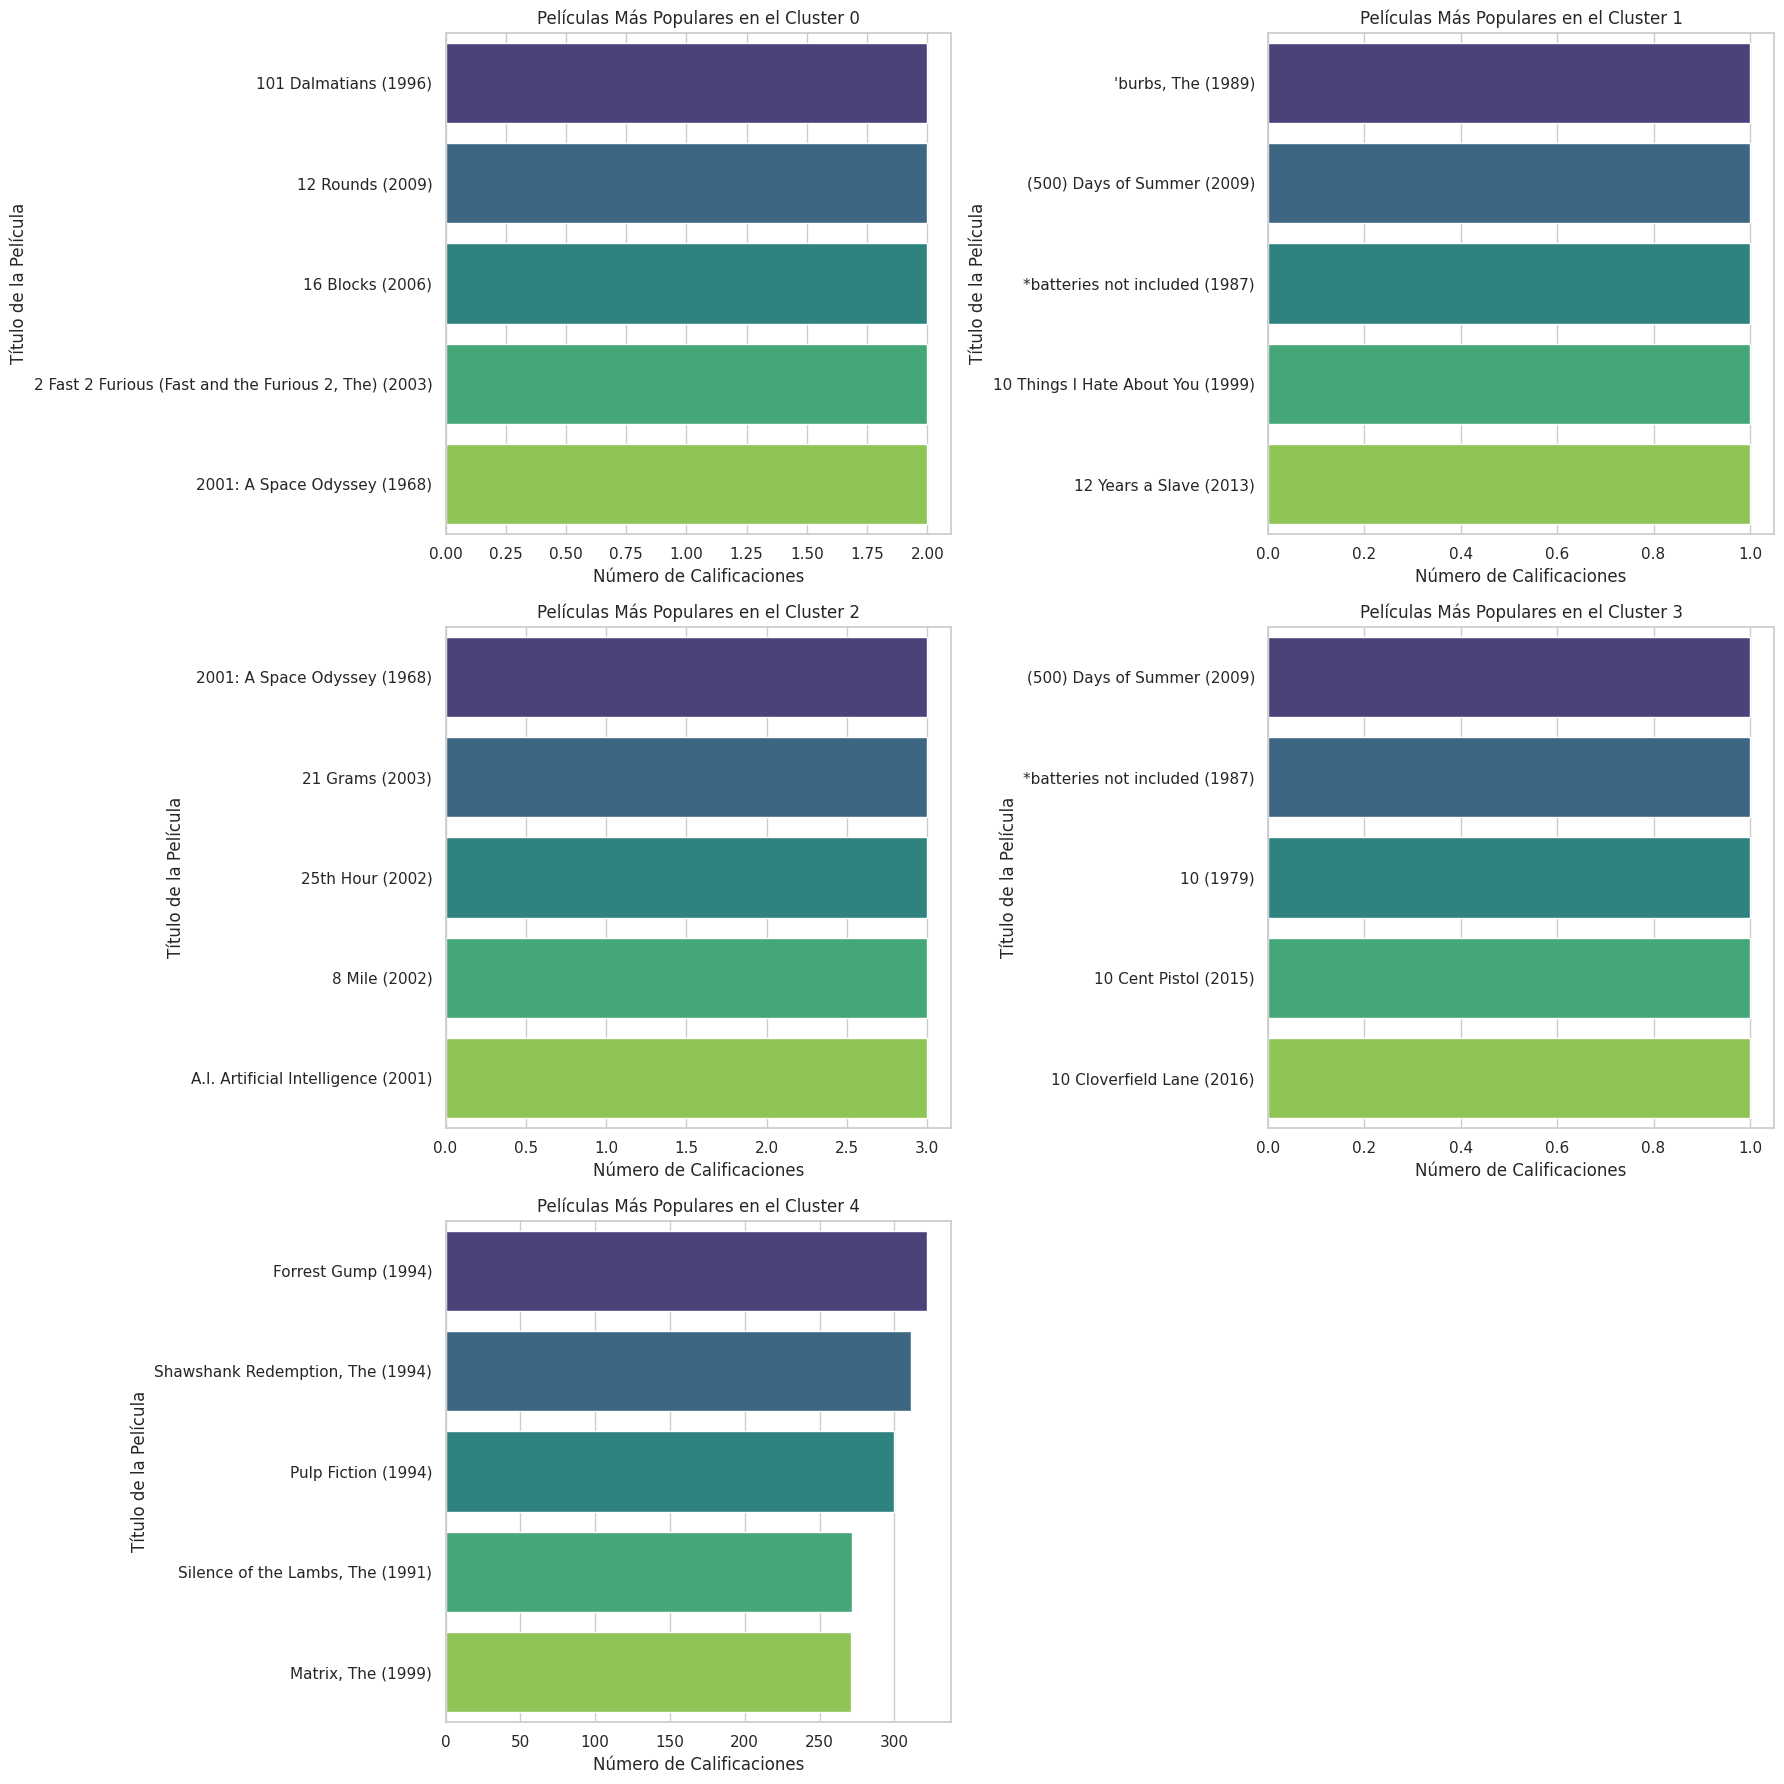

In [ ]:
# Crear gráficos de barras para las películas más populares en cada cluster
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for i, ax in enumerate(axes.flat):
    if i < 5:  # Solo tenemos 5 clusters
        cluster_movies = top_movies[top_movies['cluster'] == i]
        sns.barplot(x='count', y='title', data=cluster_movies, palette='viridis', ax=ax)
        ax.set_title(f'Películas Más Populares en el Cluster {i}')
        ax.set_xlabel('Número de Calificaciones')
        ax.set_ylabel('Título de la Película')
    else:
        fig.delaxes(ax)  # Eliminar ejes adicionales

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


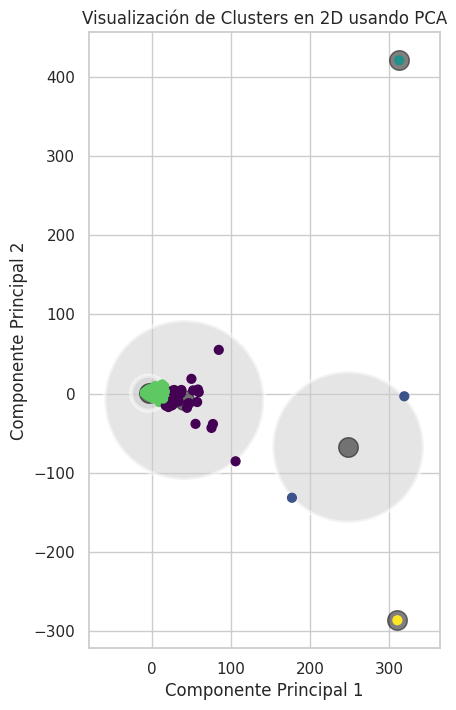

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# Promediar las calificaciones para cada película por usuario
average_ratings = merged_df.groupby(['userId', 'title'])['rating'].mean().reset_index()

# Crear la matriz de usuario-película
user_movie_matrix_avg = average_ratings.pivot_table(index='userId', columns='title', values='rating').fillna(0)

# Normalizar los datos
scaler = StandardScaler()
user_movie_matrix_avg_scaled = scaler.fit_transform(user_movie_matrix_avg)

# Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
reduced_data_avg = pca.fit_transform(user_movie_matrix_avg_scaled)

# Aplicar K-means con 5 clusters (puedes ajustar el número de clusters)
kmeans_avg_2d = KMeans(n_clusters=5, random_state=42)
kmeans_avg_2d.fit(reduced_data_avg)
labels_avg_2d = kmeans_avg_2d.labels_
centroids_avg_2d = kmeans_avg_2d.cluster_centers_

# Visualización de los clusters
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.scatter(reduced_data_avg[:, 0], reduced_data_avg[:, 1], c=labels_avg_2d, s=40, cmap='viridis', zorder=2)

# Centroides de los clusters
centers = kmeans_avg_2d.cluster_centers_

# Radio es el punto que pertenece al cluster que está más lejano
radii = [cdist(reduced_data_avg[labels_avg_2d == i], [center]).max() for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.title('Visualización de Clusters en 2D usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Distancia intra y extra cluster

In [ ]:
from sklearn.metrics import pairwise_distances

# Calcular las distancias intra-cluster
intra_cluster_distances = []
for i in range(kmeans_2d.n_clusters):
    cluster_points = reduced_data[labels_2d == i]
    if cluster_points.shape[0] > 0:
        centroid = centroids_2d[i]
        distances = np.linalg.norm(cluster_points - centroid, axis=1)
        intra_cluster_distances.append(np.mean(distances))
    else:
        intra_cluster_distances.append(0)  # Caso de cluster vacío

# Calcular las distancias entre clusters
inter_cluster_distances = pairwise_distances(centroids_2d, centroids_2d)

# Imprimir los resultados
print("Distancias Intra-Cluster Promedio:")
for i, dist in enumerate(intra_cluster_distances):
    print(f"Cluster {i}: {dist}")

print("\nDistancias Entre Clusters:")
for i in range(kmeans_2d.n_clusters):
    for j in range(i + 1, kmeans_2d.n_clusters):
        print(f"Distancia entre Cluster {i} y Cluster {j}: {inter_cluster_distances[i][j]}")

Distancias Intra-Cluster Promedio:
Cluster 0: 23.639961724757597
Cluster 1: 95.6492691934058
Cluster 2: 0.0
Cluster 3: 4.364786296196143
Cluster 4: 0.0

Distancias Entre Clusters:
Distancia entre Cluster 0 y Cluster 1: 215.25465344882215
Distancia entre Cluster 0 y Cluster 2: 507.8931480291356
Distancia entre Cluster 0 y Cluster 3: 46.031020800678114
Distancia entre Cluster 0 y Cluster 4: 387.102648066104
Distancia entre Cluster 1 y Cluster 2: 492.87212724158115
Distancia entre Cluster 1 y Cluster 3: 261.13469582126316
Distancia entre Cluster 1 y Cluster 4: 227.54511482274012
Distancia entre Cluster 2 y Cluster 3: 526.4457998348894
Distancia entre Cluster 2 y Cluster 4: 707.5014160690442
Distancia entre Cluster 3 y Cluster 4: 425.6047192796441


# Metodo del codigo para determinar el numero de clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

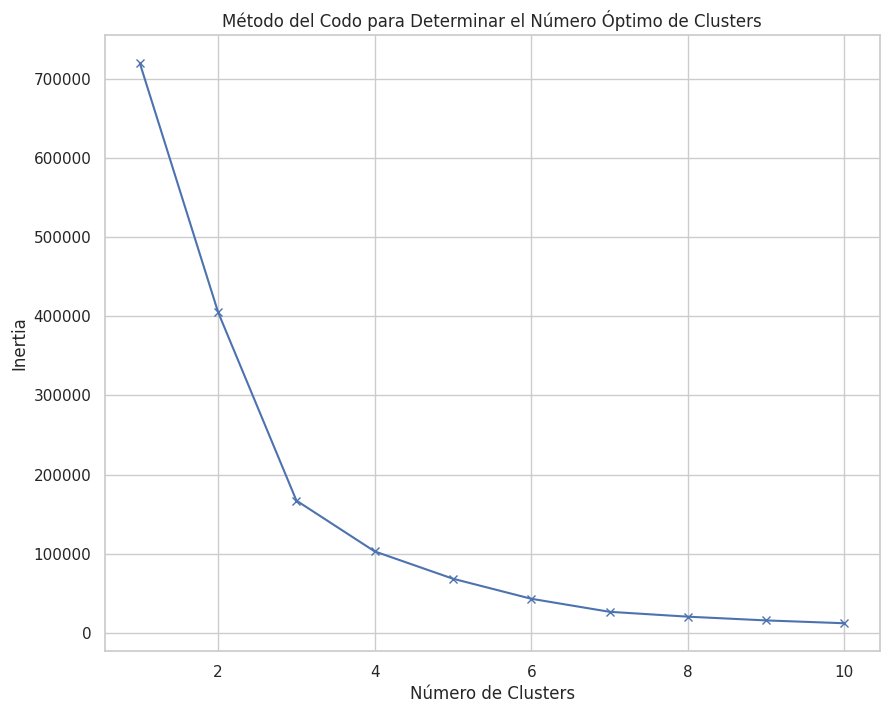

In [ ]:
# Calcular la suma de los cuadrados dentro del cluster (inertia) para diferentes números de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data_avg)
    inertia.append(kmeans.inertia_)

# Visualización del método del codo
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

El número óptimo de clusters parece estar alrededor de 4.

# Refinación de normalización con normalización robusta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


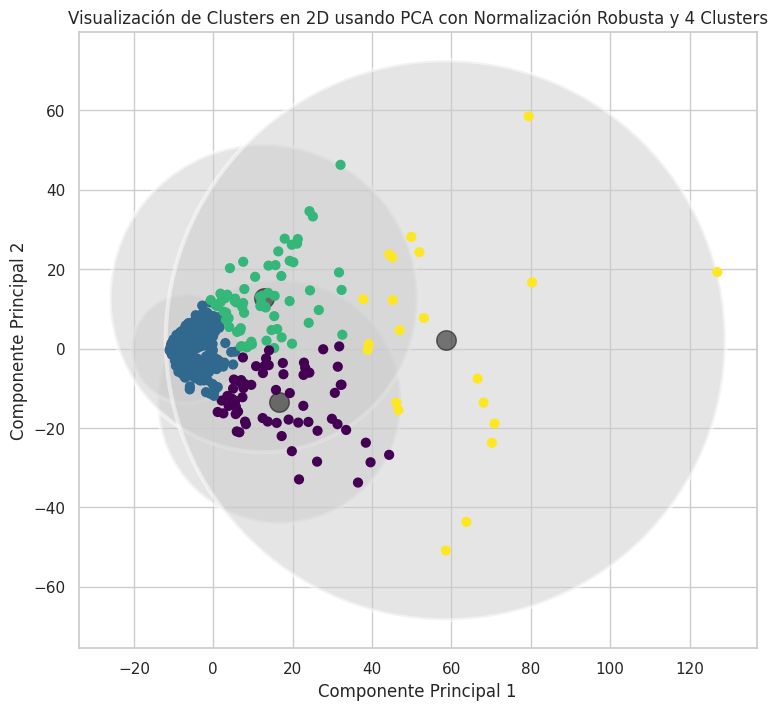

In [ ]:
from sklearn.preprocessing import RobustScaler

# Normalizar los datos usando RobustScaler
robust_scaler = RobustScaler()
user_movie_matrix_avg_robust_scaled = robust_scaler.fit_transform(user_movie_matrix_avg)

# Reducir la dimensionalidad a 2D usando PCA con los datos escalados de forma robusta
pca_robust = PCA(n_components=2)
reduced_data_avg_robust = pca_robust.fit_transform(user_movie_matrix_avg_robust_scaled)

# Aplicar K-means con 4 clusters usando los datos escalados de forma robusta
kmeans_avg_robust_2d_4clusters = KMeans(n_clusters=4, random_state=42)
kmeans_avg_robust_2d_4clusters.fit(reduced_data_avg_robust)
labels_avg_robust_2d_4clusters = kmeans_avg_robust_2d_4clusters.labels_
centroids_avg_robust_2d_4clusters = kmeans_avg_robust_2d_4clusters.cluster_centers_

# Visualización de los clusters con los datos escalados de forma robusta
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.scatter(reduced_data_avg_robust[:, 0], reduced_data_avg_robust[:, 1], c=labels_avg_robust_2d_4clusters, s=40, cmap='viridis', zorder=2)

# Centroides de los clusters
centers = kmeans_avg_robust_2d_4clusters.cluster_centers_

# Radio es el punto que pertenece al cluster que está más lejano
radii = [cdist(reduced_data_avg_robust[labels_avg_robust_2d_4clusters == i], [center]).max() for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.title('Visualización de Clusters en 2D usando PCA con Normalización Robusta y 4 Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


# Evaluación de cluster con agglomerative clustering

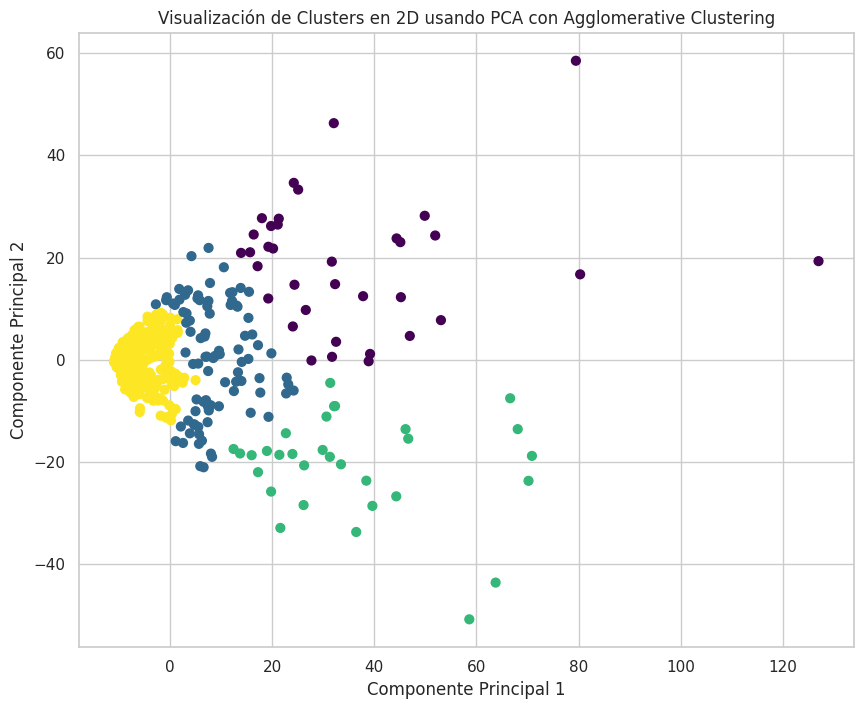

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
labels_agg = agg_clustering.fit_predict(reduced_data_avg_robust)

# Visualización de los clusters con Agglomerative Clustering
plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.scatter(reduced_data_avg_robust[:, 0], reduced_data_avg_robust[:, 1], c=labels_agg, s=40, cmap='viridis', zorder=2)

plt.title('Visualización de Clusters en 2D usando PCA con Agglomerative Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [ ]:
from sklearn.metrics import pairwise_distances

# Calcular las distancias intra-cluster para Agglomerative Clustering
intra_cluster_distances_agg = []
for i in range(4):
    cluster_points = reduced_data_avg_robust[labels_agg == i]
    if cluster_points.shape[0] > 0:
        centroid = cluster_points.mean(axis=0)
        distances = np.linalg.norm(cluster_points - centroid, axis=1)
        intra_cluster_distances_agg.append(np.mean(distances))
    else:
        intra_cluster_distances_agg.append(0)  # Caso de cluster vacío

# Calcular las distancias entre clusters para Agglomerative Clustering
centroids_agg = np.array([reduced_data_avg_robust[labels_agg == i].mean(axis=0) for i in range(4)])
inter_cluster_distances_agg = pairwise_distances(centroids_agg, centroids_agg)

# Imprimir los resultados de distancias intra-cluster y entre clusters para Agglomerative Clustering
print("Distancias Intra-Cluster Promedio:")
for i, dist in enumerate(intra_cluster_distances_agg):
    print(f"Cluster {i}: {dist}")

print("\nDistancias Entre Clusters:")
for i in range(len(centroids_agg)):
    for j in range(i + 1, len(centroids_agg)):
        print(f"Distancia entre Cluster {i} y Cluster {j}: {inter_cluster_distances_agg[i][j]}")

Distancias Intra-Cluster Promedio:
Cluster 0: 20.51795720517448
Cluster 1: 11.093862796374069
Cluster 2: 17.324406603463498
Cluster 3: 4.20631291740795

Distancias Entre Clusters:
Distancia entre Cluster 0 y Cluster 1: 32.904682874131176
Distancia entre Cluster 0 y Cluster 2: 39.75850293021133
Distancia entre Cluster 0 y Cluster 3: 46.78726176356277
Distancia entre Cluster 1 y Cluster 2: 34.450437002916104
Distancia entre Cluster 1 y Cluster 3: 15.583601767774283
Distancia entre Cluster 2 y Cluster 3: 47.50014066509586


In [ ]:
# Crear un dataframe con los usuarios y sus clusters de Agglomerative Clustering
user_clusters_agg_df = pd.DataFrame({'userId': user_movie_matrix_avg.index, 'cluster_agg': labels_agg})

# Unir los clusters al dataframe de calificaciones promedio
average_ratings = pd.merge(average_ratings, user_clusters_agg_df, on='userId', how='left')

# Encontrar las películas más populares en cada cluster
popular_movies_agg = average_ratings.groupby(['cluster_agg', 'title']).size().reset_index(name='count')
top_movies_agg = popular_movies_agg.sort_values(['cluster_agg', 'count'], ascending=[True, False]).groupby('cluster_agg').head(5)

# Mostrar los resultados
top_movies_agg_list = top_movies_agg[['cluster_agg', 'title']].values.tolist()
for cluster, movie in top_movies_agg_list:
    print(f"Cluster {cluster}: {movie}")


Cluster 0: Forrest Gump (1994)
Cluster 0: Back to the Future (1985)
Cluster 0: Groundhog Day (1993)
Cluster 0: Jurassic Park (1993)
Cluster 0: Matrix, The (1999)
Cluster 1: Forrest Gump (1994)
Cluster 1: Star Wars: Episode IV - A New Hope (1977)
Cluster 1: Matrix, The (1999)
Cluster 1: Star Wars: Episode V - The Empire Strikes Back (1980)
Cluster 1: Shawshank Redemption, The (1994)
Cluster 2: Matrix, The (1999)
Cluster 2: Dark Knight, The (2008)
Cluster 2: Forrest Gump (1994)
Cluster 2: Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Cluster 2: Catch Me If You Can (2002)
Cluster 3: Shawshank Redemption, The (1994)
Cluster 3: Forrest Gump (1994)
Cluster 3: Pulp Fiction (1994)
Cluster 3: Silence of the Lambs, The (1991)
Cluster 3: Braveheart (1995)


# Presencia de Forrest Gump en todos los clusters

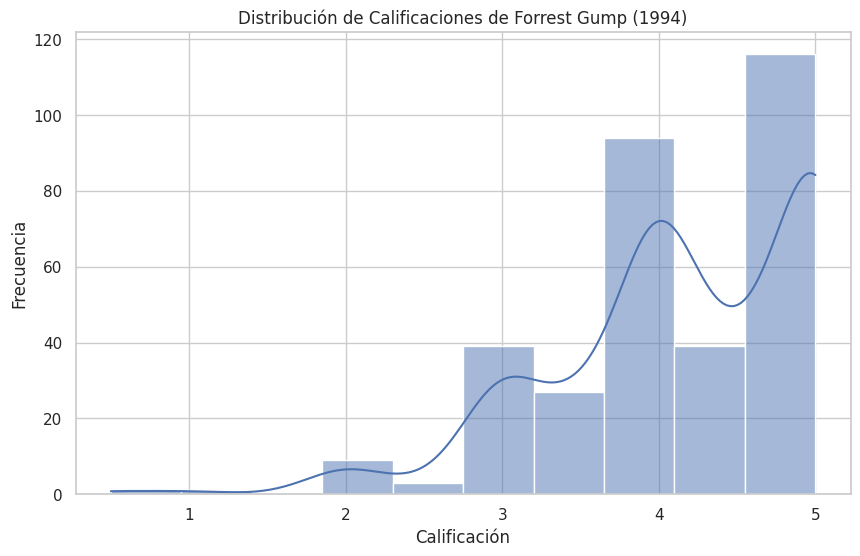

In [ ]:
# Filtrar las calificaciones de Forrest Gump
forrest_gump_ratings = average_ratings[average_ratings['title'] == 'Forrest Gump (1994)']

# Visualizar la distribución de las calificaciones
plt.figure(figsize=(10, 6))
sns.histplot(forrest_gump_ratings['rating'], bins=10, kde=True)
plt.title('Distribución de Calificaciones de Forrest Gump (1994)')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()


La distribución de las calificaciones de "Forrest Gump (1994)" muestra que esta película tiene una amplia gama de calificaciones, con una concentración notablemente alta en las calificaciones de 4 y 5 estrellas. Esto confirma que "Forrest Gump" es una película popular que recibe una variedad de calificaciones de diferentes usuarios.

In [ ]:
# Obtener el resumen de las calificaciones para cada cluster en Agglomerative Clustering
cluster_summary_agg = average_ratings.groupby('cluster_agg')['rating'].describe()

# Mostrar los resultados de manera organizada
print("Resumen de Clusters (Agglomerative Clustering)\n")

for cluster, summary in cluster_summary_agg.iterrows():
    print(f"Cluster {int(cluster)}")
    print(f"  Número de Calificaciones (count): {int(summary['count'])}")
    print(f"  Promedio de Calificaciones (mean): {summary['mean']:.2f}")
    print(f"  Desviación Estándar (std): {summary['std']:.2f}")
    print(f"  Calificación Mínima (min): {summary['min']}")
    print(f"  Primer Cuartil (25%): {summary['25%']}")
    print(f"  Mediana (50%): {summary['50%']}")
    print(f"  Tercer Cuartil (75%): {summary['75%']}")
    print(f"  Calificación Máxima (max): {summary['max']}")
    print("\n")


Resumen de Clusters (Agglomerative Clustering)

Cluster 0
  Número de Calificaciones (count): 27191
  Promedio de Calificaciones (mean): 3.33
  Desviación Estándar (std): 1.02
  Calificación Mínima (min): 0.5
  Primer Cuartil (25%): 3.0
  Mediana (50%): 3.5
  Tercer Cuartil (75%): 4.0
  Calificación Máxima (max): 5.0


Cluster 1
  Número de Calificaciones (count): 22344
  Promedio de Calificaciones (mean): 3.60
  Desviación Estándar (std): 1.05
  Calificación Mínima (min): 0.5
  Primer Cuartil (25%): 3.0
  Mediana (50%): 4.0
  Tercer Cuartil (75%): 4.0
  Calificación Máxima (max): 5.0


Cluster 2
  Número de Calificaciones (count): 21720
  Promedio de Calificaciones (mean): 3.46
  Desviación Estándar (std): 0.96
  Calificación Mínima (min): 0.5
  Primer Cuartil (25%): 3.0
  Mediana (50%): 3.5
  Tercer Cuartil (75%): 4.0
  Calificación Máxima (max): 5.0


Cluster 3
  Número de Calificaciones (count): 29577
  Promedio de Calificaciones (mean): 3.61
  Desviación Estándar (std): 1.09
  Cal

- Cluster 0: Tiene un promedio de calificaciones de 3.33, con una distribución más uniforme.
- Cluster 1: Tiene un promedio de calificaciones de 3.60, con una alta concentración en calificaciones de 3 y 4 estrellas.
- Cluster 2: Tiene un promedio de calificaciones de 3.46, con una distribución ligeramente más baja que el Cluster 1.
- Cluster 3: Tiene el promedio de calificaciones más alto de 3.61, con una alta concentración en calificaciones de 4 y 4.5 estrellas.

Análisis Comparativo
- Compactación (Intra-Cluster):

- - Agglomerative Clustering: Presenta distancias intra-cluster más pequeñas, indicando clusters más compactos y homogéneos.
- - K-means: Presenta distancias intra-cluster más grandes, especialmente para el Cluster 1, indicando mayor dispersión dentro de los clusters.
- Separación (Entre Clusters):

- - Agglomerative Clustering: Las distancias entre clusters son más pequeñas, lo que puede sugerir clusters más cercanos entre sí.
- - K-means: Las distancias entre clusters son significativamente más grandes, indicando una mayor separación entre los centroides de los clusters.